In [1]:
# import sys, os, time
# sys.path.append('/mnt/Opaisle/resources/python/')
# sys.path.append('/home/ubuntu/.local/lib/python3.4/site-packages')
# # sys.path.insert(0, '/home/ubuntu/.local/lib/python3.4/site-packages')
# import helper_functions as gp
# import pandas as pd

In [1]:
import pandas as pd
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime#, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
# from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode,iplot
# init_notebook_mode(connected=True)
# warnings.filterwarnings("ignore")
# plt.rcParams["patch.force_edgecolor"] = True
# plt.style.use('fivethirtyeight')
# mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

%matplotlib inline

In [2]:
# set display right
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 1000)
pd.set_option('max_columns', 200)

In [3]:
# Data directory
DataDir = "Input/"
OutDir = "Output/"

In [97]:
# Read dataset
df = pd.read_csv(DataDir +"ModelingData100K.csv", dtype={'customer_key':object})

In [98]:
df.head()

,Unnamed: 0,customer_key,avg_basket_size,avg_basket_price,count_num_txn,count_num_product,total_sales_amt,count_num_items,min_sales_amt,total_cost_amt,total_diff_sale_cost,total_discount_amt,count_num_return,count_online_ord,count_retail_ord,count_onsale_flag,count_promo_code,avg_daysinto_promo,age,mega_age,mega_type_age,gender,nm1_gender,nm1_marital_status,mega_homeowner,mega_type_homeowner,mega_education,mega_type_education,ethnic_code,group_ethnic_code,mega_presence_of_children,mega_type_presence_of_children,mega_number_of_children,mega_type_number_of_children,address_type,mega_income,mega_type_income,adjusted_net_worth,home_value,credit_ranges,new_credit_range,num_credit_lines,bank_card,premium_bank_card,retail_card,upscale_retail_card,social_iq_facebook,social_iq_twitter,mega_fitness_or_exercise,mega_type_fitness_or_exercise,merkle_inf_cardholders_rank,merkle_marketing_index,merkle_marketing_rank,merkle_responder_rating,spoken_language
0,0,376,6,451.000000,1,3,451.00,6,38.00,105.64,345.36,-124.03,0,0,6,0,2,9.0,48,48.0,A,F,F,S,Y,A,2.0,A,01,K,Y,A,1.0,A,S,5.0,A,304393.0,Q,C,0.0,0.0,Y,NaN,Y,Y,2.0,6.0,0.0,M,6.0,589.0,9.0,1.0,01
1,1,454,4,286.538125,9,10,1510.34,32,0.00,395.38,1114.96,-322.46,5,27,5,24,5,55.0,58,58.0,A,F,F,NaN,R,A,2.0,A,20,E,N,M,0.0,NaN,H,4.0,A,28480.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,6.0,4.0,1.0,A,2.0,7.0,2.0,0.0,20
2,2,584,7,324.070000,1,6,324.07,7,27.65,96.40,227.67,NaN,0,0,7,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,597,3,354.000000,1,1,354.00,3,118.00,93.81,260.19,-62.82,0,3,0,0,3,25.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,699,3,61.080000,1,3,61.08,3,10.99,25.61,35.47,-6.11,0,0,3,1,1,23.0,39,39.0,A,F,F,S,Y,A,3.0,A,21,E,N,A,0.0,NaN,S,5.0,A,397672.0,R,F,0.0,0.0,Y,NaN,NaN,NaN,6.0,6.0,1.0,A,1.0,23.0,3.0,1.0,01


In [99]:
df.shape

(100000, 55)

In [100]:
# Get some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)


,Unnamed: 0,customer_key,avg_basket_size,avg_basket_price,count_num_txn,count_num_product,total_sales_amt,count_num_items,min_sales_amt,total_cost_amt,total_diff_sale_cost,total_discount_amt,count_num_return,count_online_ord,count_retail_ord,count_onsale_flag,count_promo_code,avg_daysinto_promo,age,mega_age,mega_type_age,gender,nm1_gender,nm1_marital_status,mega_homeowner,mega_type_homeowner,mega_education,mega_type_education,ethnic_code,group_ethnic_code,mega_presence_of_children,mega_type_presence_of_children,mega_number_of_children,mega_type_number_of_children,address_type,mega_income,mega_type_income,adjusted_net_worth,home_value,credit_ranges,new_credit_range,num_credit_lines,bank_card,premium_bank_card,retail_card,upscale_retail_card,social_iq_facebook,social_iq_twitter,mega_fitness_or_exercise,mega_type_fitness_or_exercise,merkle_inf_cardholders_rank,merkle_marketing_index,merkle_marketing_rank,merkle_responder_rating,spoken_language
column type,int64,object,int64,float64,int64,int64,float64,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,int64,float64,object,object,object,object,object,object,float64,object,object,object,object,object,float64,object,object,float64,object,float64,object,object,float64,float64,object,object,object,object,float64,float64,float64,object,float64,float64,float64,float64,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,17415,0,0,0,0,0,28080,0,3137,3137,5750,4763,9450,3137,3137,3137,3137,4716,4716,3137,3137,3137,24459,752,3137,3137,3137,13744,36162,8574,8574,7409,70143,36997,53698,1536,1536,3137,3137,3137,5820,3137,3137,4716
null values (%),0,0,0,0,0,0,0,0,0,0,0,17.415,0,0,0,0,0,28.08,0,3.137,3.137,5.75,4.763,9.45,3.137,3.137,3.137,3.137,4.716,4.716,3.137,3.137,3.137,24.459,0.752,3.137,3.137,3.137,13.744,36.162,8.574,8.574,7.409,70.143,36.997,53.698,1.536,1.536,3.137,3.137,3.137,5.82,3.137,3.137,4.716


First create kmeans on txn data only - as its only numeric, easier. but before that run correlation analysis, this should be covered in eda on customer data

Then consider demo data sequentially

In [8]:
# Consider all numerical columns
numData = df.select_dtypes(include=['float64', 'int64'])
numCol = numData.columns
print(numCol)

Index(['Unnamed: 0', 'avg_basket_size', 'avg_basket_price', 'count_num_txn', 'count_num_product', 'total_sales_amt', 'count_num_items', 'min_sales_amt', 'total_cost_amt', 'total_diff_sale_cost', 'total_discount_amt', 'count_num_return', 'count_online_ord', 'count_retail_ord', 'count_onsale_flag', 'count_promo_code', 'avg_daysinto_promo', 'age', 'mega_age', 'mega_education', 'mega_number_of_children', 'mega_income', 'adjusted_net_worth', 'new_credit_range', 'num_credit_lines', 'social_iq_facebook', 'social_iq_twitter', 'mega_fitness_or_exercise', 'merkle_inf_cardholders_rank', 'merkle_marketing_index', 'merkle_marketing_rank', 'merkle_responder_rating'], dtype='object')


In [9]:
# Imputation - with 0 (discount_amt, any other cont. variables)
df.fillna({x:0 for x in numCol}, inplace=True) 

,Unnamed: 0,customer_key,avg_basket_size,avg_basket_price,count_num_txn,count_num_product,total_sales_amt,count_num_items,min_sales_amt,total_cost_amt,total_diff_sale_cost,total_discount_amt,count_num_return,count_online_ord,count_retail_ord,count_onsale_flag,count_promo_code,avg_daysinto_promo,age,mega_age,mega_type_age,gender,nm1_gender,nm1_marital_status,mega_homeowner,mega_type_homeowner,mega_education,mega_type_education,ethnic_code,group_ethnic_code,mega_presence_of_children,mega_type_presence_of_children,mega_number_of_children,mega_type_number_of_children,address_type,mega_income,mega_type_income,adjusted_net_worth,home_value,credit_ranges,new_credit_range,num_credit_lines,bank_card,premium_bank_card,retail_card,upscale_retail_card,social_iq_facebook,social_iq_twitter,mega_fitness_or_exercise,mega_type_fitness_or_exercise,merkle_inf_cardholders_rank,merkle_marketing_index,merkle_marketing_rank,merkle_responder_rating,spoken_language
0,0,376,6,4.510000e+02,1,3,4.510000e+02,6,38.00,1.056400e+02,3.453600e+02,-1.240300e+02,0,0,6,0,2,9.0,48,48.0,A,F,F,S,Y,A,2.0,A,01,K,Y,A,1.0,A,S,5.0,A,304393.0,Q,C,0.0,0.0,Y,NaN,Y,Y,2.0,6.0,0.0,M,6.0,589.0,9.0,1.0,01
1,1,454,4,2.865381e+02,9,10,1.510340e+03,32,0.00,3.953800e+02,1.114960e+03,-3.224600e+02,5,27,5,24,5,55.0,58,58.0,A,F,F,NaN,R,A,2.0,A,20,E,N,M,0.0,NaN,H,4.0,A,28480.0,NaN,NaN,0.0,0.0,Y,NaN,NaN,NaN,6.0,4.0,1.0,A,2.0,7.0,2.0,0.0,20
2,2,584,7,3.240700e+02,1,6,3.240700e+02,7,27.65,9.640000e+01,2.276700e+02,0.000000e+00,0,0,7,0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
3,3,597,3,3.540000e+02,1,1,3.540000e+02,3,118.00,9.381000e+01,2.601900e+02,-6.282000e+01,0,3,0,0,3,25.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
4,4,699,3,6.108000e+01,1,3,6.108000e+01,3,10.99,2.561000e+01,3.547000e+01,-6.110000e+00,0,0,3,1,1,23.0,39,39.0,A,F,F,S,Y,A,3.0,A,21,E,N,A,0.0,NaN,S,5.0,A,397672.0,R,F,0.0,0.0,Y,NaN,NaN,NaN,6.0,6.0,1.0,A,1.0,23.0,3.0,1.0,01
5,5,706,1,4.680000e+01,1,1,4.680000e+01,1,46.80,1.883000e+01,2.797000e+01,0.000000e+00,0,0,1,0,0,0.0,29,29.0,A,F,F,M,Y,A,2.0,A,20,E,Y,A,1.0,A,S,8.0,A,85200.0,M,C,3.0,1.0,Y,Y,Y,Y,4.0,5.0,1.0,A,10.0,1120.0,10.0,3.0,01
6,6,766,10,5.448000e+02,1,2,5.448000e+02,10,49.97,1.555500e+02,3.892500e+02,-8.449000e+01,0,10,0,10,4,166.0,52,52.0,A,F,F,M,Y,A,1.0,A,01,K,Y,A,4.0,A,S,4.0,A,261918.0,N,B,0.0,0.0,Y,NaN,Y,Y,2.0,3.0,1.0,A,10.0,513.0,9.0,4.0,01
7,7,801,6,3.856800e+02,2,5,7.713600e+02,12,32.89,1.837300e+02,5.876300e+02,-1.150700e+02,0,0,12,0,5,40.0,52,51.0,A,F,F,M,Y,A,4.0,A,01,K,Y,A,1.0,A,S,5.0,A,279813.0,O,NaN,0.0,0.0,Y,NaN,NaN,NaN,3.0,3.0,0.0,M,10.0,367.0,8.0,1.0,01
8,8,908,1,1.450000e+01,1,1,1.450000e+01,1,14.50,1.630000e+00,1.287000e+01,-1.450000e+01,0,0,1,0,0,0.0,65,74.0,A,F,M,M,R,A,2.0,M,19,E,N,A,0.0,NaN,P,4.0,A,4656.0,NaN,NaN,0.0,0.0,Y,NaN,Y,Y,2.0,3.0,0.0,M,5.0,598.0,9.0,1.0,01
9,9,1146,1,1.649000e+01,1,1,1.649000e+01,1,16.49,1.185000e+01,4.640000e+00,-1.500000e+01,0,0,1,0,1,30.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN


In [10]:
# Get some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)


,Unnamed: 0,customer_key,avg_basket_size,avg_basket_price,count_num_txn,count_num_product,total_sales_amt,count_num_items,min_sales_amt,total_cost_amt,total_diff_sale_cost,total_discount_amt,count_num_return,count_online_ord,count_retail_ord,count_onsale_flag,count_promo_code,avg_daysinto_promo,age,mega_age,mega_type_age,gender,nm1_gender,nm1_marital_status,mega_homeowner,mega_type_homeowner,mega_education,mega_type_education,ethnic_code,group_ethnic_code,mega_presence_of_children,mega_type_presence_of_children,mega_number_of_children,mega_type_number_of_children,address_type,mega_income,mega_type_income,adjusted_net_worth,home_value,credit_ranges,new_credit_range,num_credit_lines,bank_card,premium_bank_card,retail_card,upscale_retail_card,social_iq_facebook,social_iq_twitter,mega_fitness_or_exercise,mega_type_fitness_or_exercise,merkle_inf_cardholders_rank,merkle_marketing_index,merkle_marketing_rank,merkle_responder_rating,spoken_language
column type,int64,object,int64,float64,int64,int64,float64,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,int64,float64,object,object,object,object,object,object,float64,object,object,object,object,object,float64,object,object,float64,object,float64,object,object,float64,float64,object,object,object,object,float64,float64,float64,object,float64,float64,float64,float64,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3137,5750,4763,9450,3137,3137,0,3137,4716,4716,3137,3137,0,24459,752,0,3137,0,13744,36162,0,0,7409,70143,36997,53698,0,0,0,3137,0,0,0,0,4716
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.137,5.75,4.763,9.45,3.137,3.137,0,3.137,4.716,4.716,3.137,3.137,0,24.459,0.752,0,3.137,0,13.744,36.162,0,0,7.409,70.143,36.997,53.698,0,0,0,3.137,0,0,0,0,4.716


In [46]:
df[['age', 'mega_age', 'mega_type_age']]

,age,mega_age,mega_type_age
0,48,48.0,A
1,58,58.0,A
2,0,0.0,NaN
3,0,0.0,NaN
4,39,39.0,A
5,29,29.0,A
6,52,52.0,A
7,52,51.0,A
8,65,74.0,A
9,0,0.0,NaN


In [11]:
df = pd.concat([df, pd.get_dummies(df['gender'], prefix='gender')], axis=1) 
# data[['City', 'City_London', 'City_New Delhi', 'City_New York']]

In [12]:
df.head()

,Unnamed: 0,customer_key,avg_basket_size,avg_basket_price,count_num_txn,count_num_product,total_sales_amt,count_num_items,min_sales_amt,total_cost_amt,total_diff_sale_cost,total_discount_amt,count_num_return,count_online_ord,count_retail_ord,count_onsale_flag,count_promo_code,avg_daysinto_promo,age,mega_age,mega_type_age,gender,nm1_gender,nm1_marital_status,mega_homeowner,mega_type_homeowner,mega_education,mega_type_education,ethnic_code,group_ethnic_code,mega_presence_of_children,mega_type_presence_of_children,mega_number_of_children,mega_type_number_of_children,address_type,mega_income,mega_type_income,adjusted_net_worth,home_value,credit_ranges,new_credit_range,num_credit_lines,bank_card,premium_bank_card,retail_card,upscale_retail_card,social_iq_facebook,social_iq_twitter,mega_fitness_or_exercise,mega_type_fitness_or_exercise,merkle_inf_cardholders_rank,merkle_marketing_index,merkle_marketing_rank,merkle_responder_rating,spoken_language,gender_F,gender_M,gender_U
0,0,376,6,451.000000,1,3,451.00,6,38.00,105.64,345.36,-124.03,0,0,6,0,2,9.0,48,48.0,A,F,F,S,Y,A,2.0,A,01,K,Y,A,1.0,A,S,5.0,A,304393.0,Q,C,0.0,0.0,Y,NaN,Y,Y,2.0,6.0,0.0,M,6.0,589.0,9.0,1.0,01,1,0,0
1,1,454,4,286.538125,9,10,1510.34,32,0.00,395.38,1114.96,-322.46,5,27,5,24,5,55.0,58,58.0,A,F,F,NaN,R,A,2.0,A,20,E,N,M,0.0,NaN,H,4.0,A,28480.0,NaN,NaN,0.0,0.0,Y,NaN,NaN,NaN,6.0,4.0,1.0,A,2.0,7.0,2.0,0.0,20,1,0,0
2,2,584,7,324.070000,1,6,324.07,7,27.65,96.40,227.67,0.00,0,0,7,0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,0,0
3,3,597,3,354.000000,1,1,354.00,3,118.00,93.81,260.19,-62.82,0,3,0,0,3,25.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,0,0
4,4,699,3,61.080000,1,3,61.08,3,10.99,25.61,35.47,-6.11,0,0,3,1,1,23.0,39,39.0,A,F,F,S,Y,A,3.0,A,21,E,N,A,0.0,NaN,S,5.0,A,397672.0,R,F,0.0,0.0,Y,NaN,NaN,NaN,6.0,6.0,1.0,A,1.0,23.0,3.0,1.0,01,1,0,0


In [13]:
df.columns

Index(['Unnamed: 0', 'customer_key', 'avg_basket_size', 'avg_basket_price', 'count_num_txn', 'count_num_product', 'total_sales_amt', 'count_num_items', 'min_sales_amt', 'total_cost_amt', 'total_diff_sale_cost', 'total_discount_amt', 'count_num_return', 'count_online_ord', 'count_retail_ord', 'count_onsale_flag', 'count_promo_code', 'avg_daysinto_promo', 'age', 'mega_age', 'mega_type_age', 'gender', 'nm1_gender', 'nm1_marital_status', 'mega_homeowner', 'mega_type_homeowner', 'mega_education', 'mega_type_education', 'ethnic_code', 'group_ethnic_code', 'mega_presence_of_children', 'mega_type_presence_of_children', 'mega_number_of_children', 'mega_type_number_of_children', 'address_type', 'mega_income', 'mega_type_income', 'adjusted_net_worth', 'home_value', 'credit_ranges', 'new_credit_range', 'num_credit_lines', 'bank_card', 'premium_bank_card', 'retail_card', 'upscale_retail_card', 'social_iq_facebook', 'social_iq_twitter', 'mega_fitness_or_exercise', 'mega_type_fitness_or_exercise', 'm

In [82]:
txn_cols = ['customer_key', 'avg_basket_size', 'avg_basket_price', 'count_num_txn', 'count_num_product', 'total_sales_amt', 
            'count_num_items', 'min_sales_amt', 'total_cost_amt', 'total_diff_sale_cost', 'total_discount_amt', 
            'count_num_return', 'count_online_ord', 'count_retail_ord', 'count_onsale_flag', 'count_promo_code', 
            'avg_daysinto_promo']

In [83]:
demo_cols = ['age', 'gender', 'mega_education', 'mega_income', 'adjusted_net_worth']

# What does negtive discount mean? what about positive?

### Lets create Kmeans clustering on customer data

In [85]:
# df_sample = df.sample(10000)[['customer_key', 'count_onsale_flag', 'count_promo_code', 
#                               'total_discount_amt', 'total_sales_amt','adjusted_net_worth']]
cols = txn_cols + demo_cols
df_sample = df.sample(10000)[cols]
print(df_sample.shape)
df_sample.head()

(10000, 22)


,customer_key,avg_basket_size,avg_basket_price,count_num_txn,count_num_product,total_sales_amt,count_num_items,min_sales_amt,total_cost_amt,total_diff_sale_cost,total_discount_amt,count_num_return,count_online_ord,count_retail_ord,count_onsale_flag,count_promo_code,avg_daysinto_promo,age,gender,mega_education,mega_income,adjusted_net_worth
72168,6058176,1,27.590000,1,1,27.59,1,27.59,16.28,11.31,-2.76,0,0,1,0,1,13.0,59,F,1.0,12.0,1077952.0
54297,4541081,4,98.780000,1,2,98.78,4,22.79,46.96,51.82,-37.41,0,0,4,0,2,74.0,0,NaN,4.0,4.0,156162.0
9386,752661,-1,-89.562909,14,13,203.50,55,0.00,36.78,166.72,-77.98,26,55,0,18,4,79.0,50,F,3.0,7.0,227975.0
27199,2197245,1,79.500000,1,1,79.50,1,79.50,23.59,55.91,-31.80,0,0,1,0,0,0.0,32,F,3.0,6.0,98827.0
18760,1571771,1,74.387500,4,6,244.10,8,0.00,40.83,203.27,-77.06,2,4,4,0,3,5.0,39,F,4.0,8.0,555961.0


In [96]:
df_sample['age'].describe()

count    10000.000000
mean        43.163300
std         17.827406
min          0.000000
25%         39.000000
50%         46.000000
75%         53.000000
max         93.000000
Name: age, dtype: float64

In [89]:
df_sample['gender'].value_counts()

F    8233
M    1149
U      31
Name: gender, dtype: int64

In [90]:
df_sample['mega_education'].value_counts()
# 1	High School
# 2	Some College
# 3	Completed College
# 4	Graduate School

3.0    3504
2.0    2640
4.0    1891
1.0    1653
0.0     312
Name: mega_education, dtype: int64

In [93]:
df_sample['adjusted_net_worth'].describe()
# A household level modeled variable that estimates the net worth (home equity + all sorts of investments) of a household in
# dollar amount adjusted by cost of living at CBSA level.


count    1.000000e+04
mean     3.481796e+05
std      2.301535e+05
min     -6.304000e+04
25%      1.818405e+05
50%      3.017690e+05
75%      4.723630e+05
max      1.352059e+06
Name: adjusted_net_worth, dtype: float64

In [95]:
df_sample['mega_income'].value_counts()
# The actual household income and when missing, modeled equivalent.
# MV002	01	<$15,000
# MV002	02	$15,000-$24,999
# MV002	03	$25,000-$34,999
# MV002	04	$35,000-$49,999
# MV002	05	$50,000-$74,999
# MV002	06	$75,000-$99,999
# MV002	07	$100,000-$124,999
# MV002	08	$125,000-$149,999
# MV002	09	$150,000-$174,999
# MV002	10	$175,000-$199,999
# MV002	11	$200,000-$249,999
# MV002	12	$250,000+


6.0     1638
8.0     1332
12.0    1332
7.0     1107
5.0     1040
10.0     785
11.0     756
9.0      422
4.0      422
2.0      323
0.0      312
3.0      299
1.0      232
Name: mega_income, dtype: int64

In [86]:
# Create the matrix for kmeans algorithms
# matrix = df.drop(['customer_key'], axis=1).as_matrix() # deprecated
matrix = df_sample.drop(['customer_key'], axis=1).values

In [87]:
# Make sure to scale the variables
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

ValueError: could not convert string to float: 'F'

In [40]:
# # Get pairwise Euclidean distance
# from sklearn.neighbors import DistanceMetric
# dist = DistanceMetric.get_metric('euclidean')
# dist_euclidean = dist.pairwise(scaled_matrix)

In [41]:
# dist_euclidean

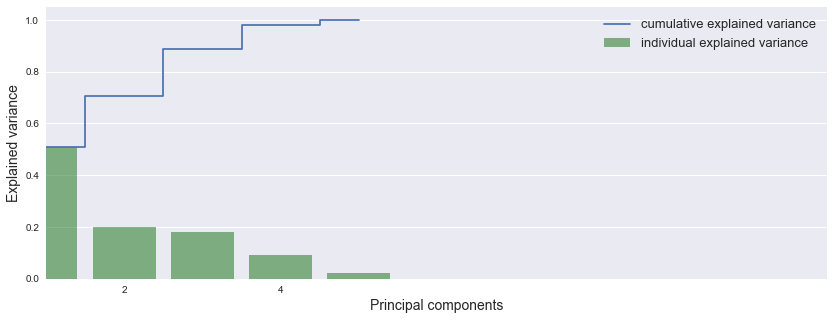

In [50]:
# Use PCA to get a base of runing clusters, and represent the amount of variance 
# explained by each of the component
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)


fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

For n_clusters = 2 The average silhouette_score is : 0.5253240794343194 

For n_clusters = 3 The average silhouette_score is : 0.4769690600500808

For n_clusters = 4 The average silhouette_score is : 0.48713607117336644

For n_clusters = 5 The average silhouette_score is : 0.3988463010654639

For n_clusters = 6 The average silhouette_score is : 0.36587374021405894

For n_clusters = 7 The average silhouette_score is : 0.3997680137515969

For n_clusters = 8 The average silhouette_score is : 0.37710460174662086

For n_clusters = 9 The average silhouette_score is : 0.28830184791088925

In [51]:
# Lets define clusters of customers based on the silhouette score
#%%time
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.516569380404
For n_clusters = 3 The average silhouette_score is : 0.309639911715
For n_clusters = 4 The average silhouette_score is : 0.328497186297
For n_clusters = 5 The average silhouette_score is : 0.336613561177
For n_clusters = 6 The average silhouette_score is : 0.339594530772
For n_clusters = 7 The average silhouette_score is : 0.316582112128
For n_clusters = 8 The average silhouette_score is : 0.241964692932
For n_clusters = 9 The average silhouette_score is : 0.249163656706


In [52]:
X=scaled_matrix

In [55]:
# label_x = X.columns[0]
X

array([[-0.04531735, -0.94226879,  0.67001942, -0.24420589,  0.34909672],
       [-0.27831146, -0.94226879,  0.67001942, -0.54207704,  0.10345266],
       [-0.27831146, -0.36918231,  0.67001942, -0.68487126,  0.56853107],
       ..., 
       [-0.27831146, -0.36918231,  0.63064776, -0.59735938, -0.21886061],
       [ 0.18767675,  1.9231636 , -2.92014948,  2.00454077, -1.4863654 ],
       [-0.27831146, -0.94226879,  0.13296825, -0.38637488, -0.63512999]])

For n_clusters = 2 The average silhouette_score is : 0.516569380404


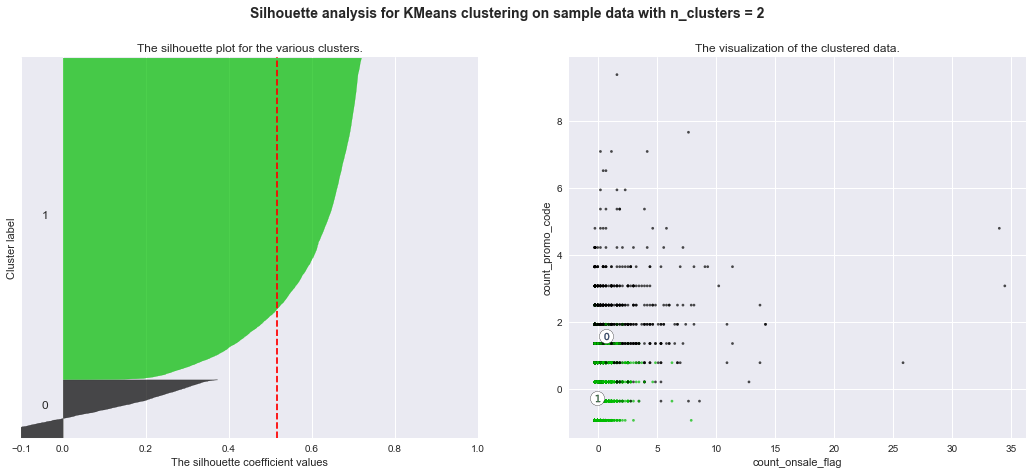

For n_clusters = 3 The average silhouette_score is : 0.309344628983


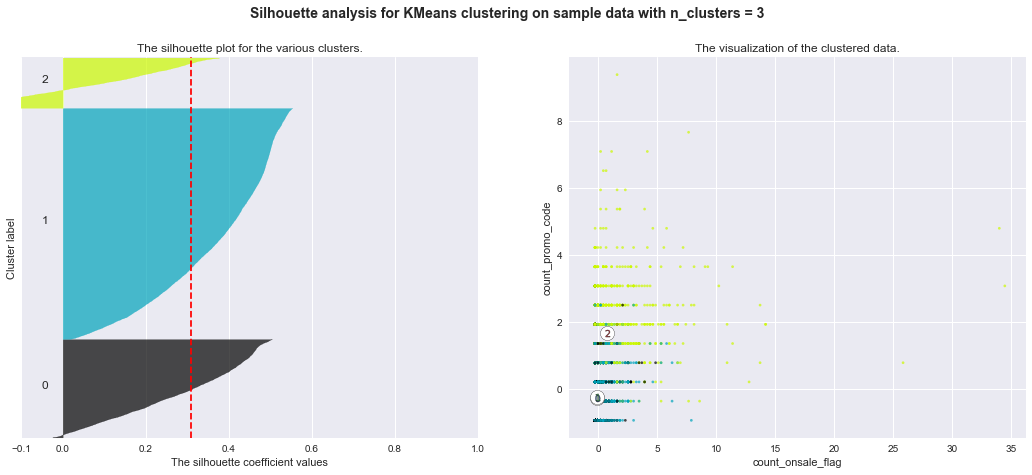

For n_clusters = 4 The average silhouette_score is : 0.328362968529


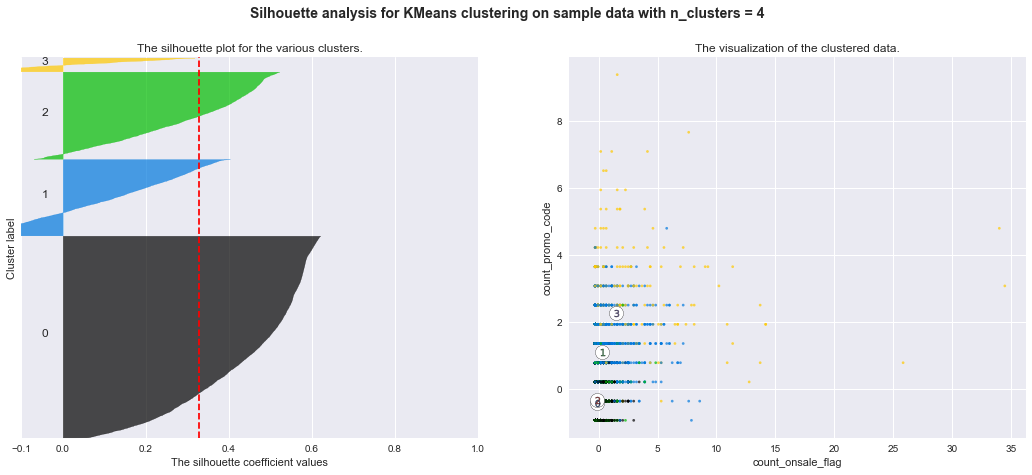

For n_clusters = 5 The average silhouette_score is : 0.336613561177


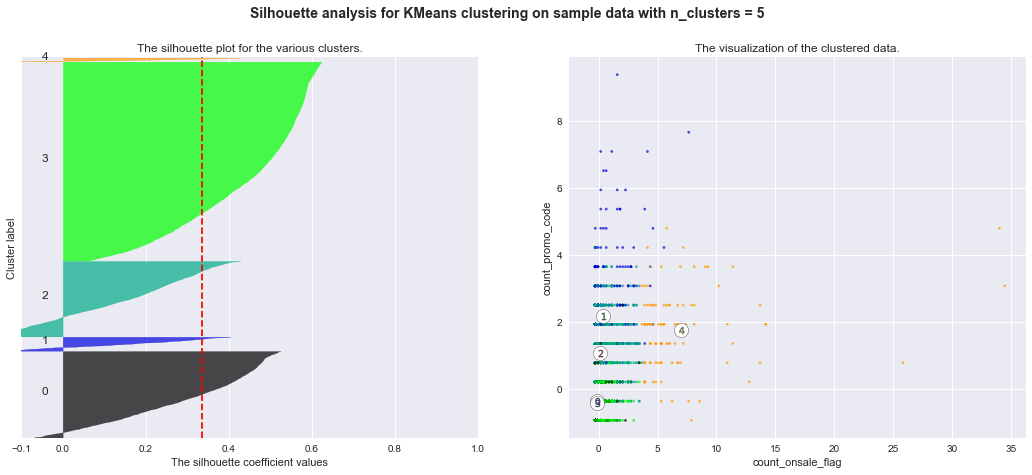

For n_clusters = 6 The average silhouette_score is : 0.338668048413


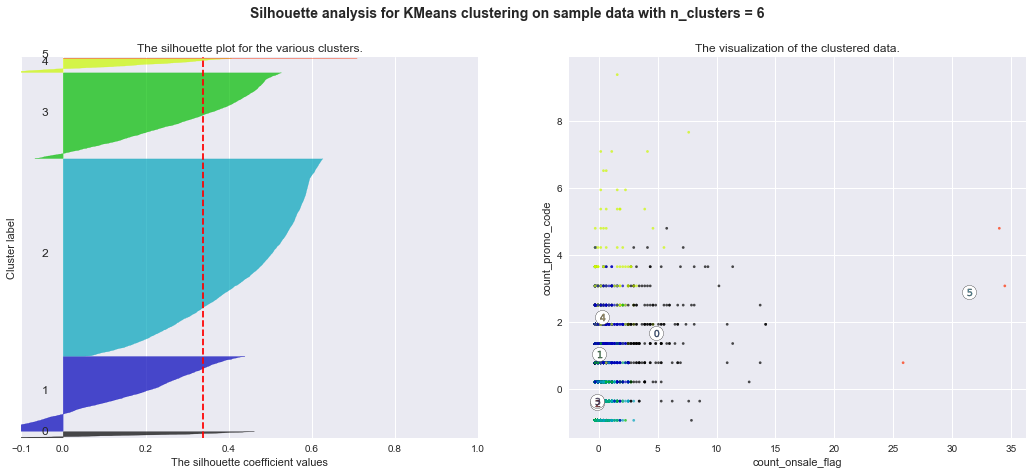

For n_clusters = 7 The average silhouette_score is : 0.316367587569


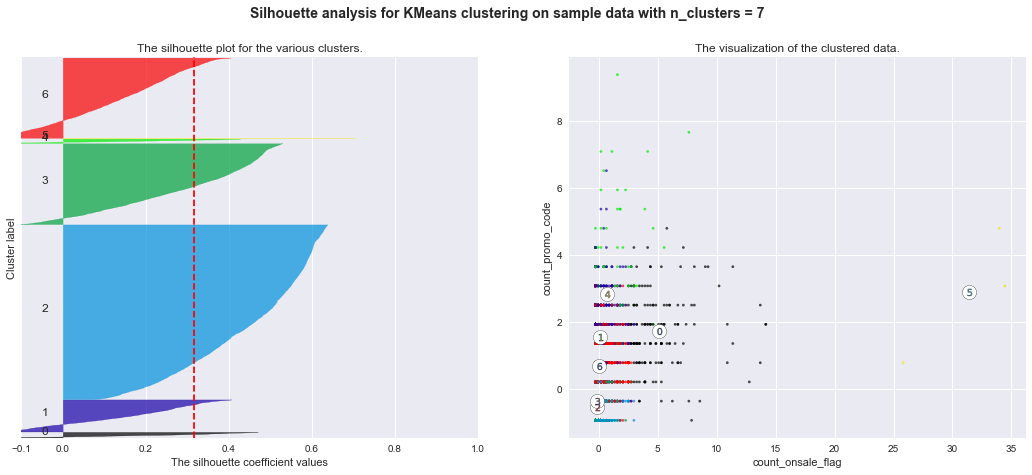

For n_clusters = 8 The average silhouette_score is : 0.241964692932


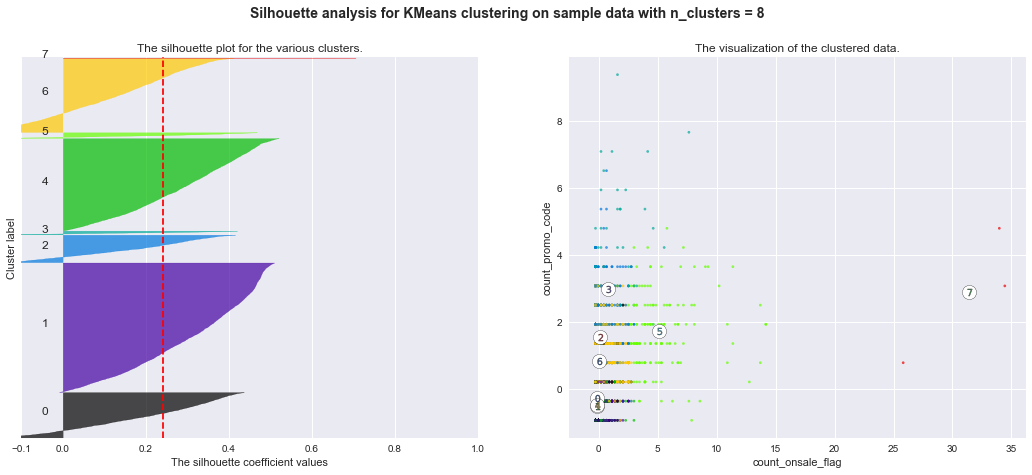

For n_clusters = 9 The average silhouette_score is : 0.249237083416


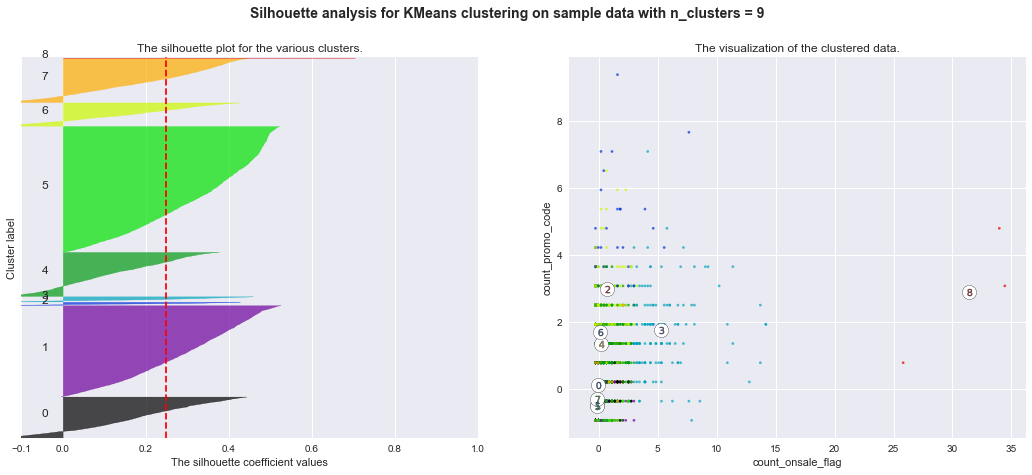

In [67]:
for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    label_x = df_sample.columns[1]
    label_y = df_sample.columns[2]


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(label_x)
    ax2.set_ylabel(label_y)
    
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [23]:
# Seems 2/3/5 is the best
n_clusters = 3
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.424053086593


In [24]:
# Check the number of customers in each class
pd.DataFrame(pd.Series(clusters).value_counts(), columns = ['Number of customers']).T

,2,0,1
Number of customers,6352,2645,1003


In [25]:
df_sample['cluster_kmeans'] = pd.Series(clusters, index=df_sample.index)

In [27]:
df_sample.head()

,customer_key,total_sales_amt,adjusted_net_worth,cluster_kmeans
50799,4242479,485.40,266875.0,0
85906,7168780,79.50,187428.0,0
85704,7152059,237.10,1116615.0,1
89545,7485404,1867.09,357322.0,2
68303,5718158,384.00,843508.0,1


https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/Sessions45/ClusterAnalysisReading.html

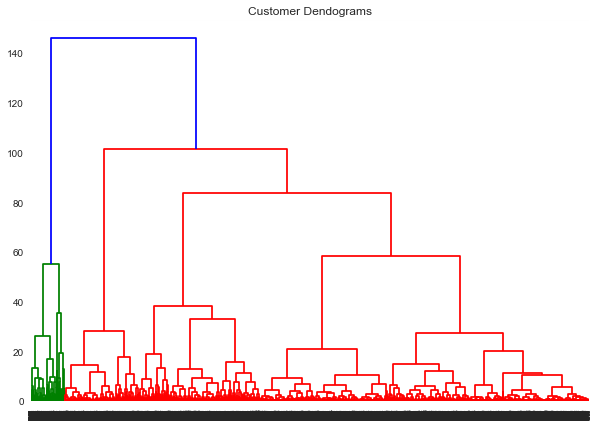

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(scaled_matrix, method='ward'))  

Lets try 5 clusters


In [27]:
n_clusters = 3

In [30]:
# Lets try Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(scaled_matrix) 
print(cluster.labels_) 
silhouette_avg = silhouette_score(scaled_matrix, clusters)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

[0 0 1 ..., 0 0 0]
For n_clusters = 3 The average silhouette_score is : 0.462460214099


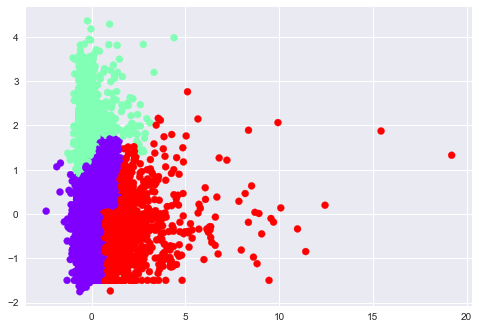

In [31]:
plt.scatter(scaled_matrix[:,0],scaled_matrix[:,1], c=cluster.labels_, cmap='rainbow')  

Most statistical methods for clustering and segmentation use common mathematical measures of distance. Typical measures are, for example, the Euclidean distance or the Manhattan distance (see help(dist) in R for more examples). 

The Euclidean distance between two observations (in our case, customers) is simply the square root of the average of the square difference between the attributes of the two observations (in our case, customers).

In [68]:
pca = PCA(n_components=3)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters)

KeyError: 3

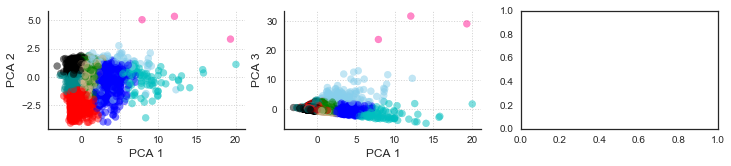

In [69]:
# in order to create a representation of the various clusters:

import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
#            title='Cluster', facecolor = 'lightgrey',
           title='Cluster', 
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

In [33]:
# Lets find the silhouette scores for each element of the different clusters
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
#         color = cm.spectral(float(i) / n_clusters)        
        color = plt.cm.Spectral(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

In [31]:
# One way to look at the quality of the separation is to look at silouhette scores within different clusters:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters)

# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters)

# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters)


NameError: name 'graph_component_silhouette' is not defined

# Lets try minibatch kmeans and compare with regular kmeans


In [32]:
# Lets try minibatch and 
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [35]:
range(3)

range(0, 3)

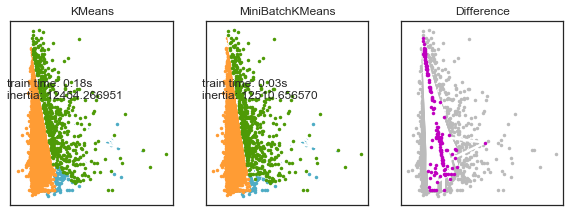

In [36]:

# from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
np.random.seed(0)

batch_size = 55
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
# X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

# #############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

# #############################################################################
# Compute clustering with MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

# #############################################################################
# Plot result

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

https://github.com/angeloskath/py-kmeans/blob/master/examples.py